# Tracking Buoys
last updated Jan 24 2024

In [17]:
pip install buoyant

Note: you may need to restart the kernel to use updated packages.


In [18]:
from buoyant import Buoy

# Gives Image URLs

In [19]:
## NEW YORK HARBOUR ENTRANCE BUOY: STATION 44065
## https://www.ndbc.noaa.gov/station_page.php?station=44065
ny_station = Buoy(44065)
print(ny_station.image_url)

## EAST SANTA BARBARA: STATION 46053
## https://www.ndbc.noaa.gov/station_page.php?station=46053
sb_station = Buoy(46053)
print(sb_station.image_url)

## SAN DIEGO, TANNER BANK: STATION 46047
## https://www.ndbc.noaa.gov/station_page.php?station=46047
sd_station = Buoy(46047)
print(sd_station.image_url)

https://www.ndbc.noaa.gov/buoycam.php?station=44065
https://www.ndbc.noaa.gov/buoycam.php?station=46053
https://www.ndbc.noaa.gov/buoycam.php?station=46047


# Get current time and date

In [20]:
import os
from datetime import datetime, timedelta

current_datetime = datetime.now()
print("Current Date and Time:", current_datetime)

Current Date and Time: 2024-01-30 01:45:26.631817


In [21]:
current_time = current_datetime.strftime('%H:%M')
print(current_time)

01:45


In [22]:
# Create a new folder every day a new day starts

def create_folder_everyday(base_path):
    current_date = datetime.now().date()
    current_folder_path = os.path.join(base_path, str(current_date))
    
    #if folder doesnt exist yet
    if not os.path.exists(current_folder_path):
        os.makedirs(current_folder_path)
        print(f"New folder created: {current_folder_path}")
        
    return current_folder_path


## Creating new folder every day for each buoy
base_path_ny = "downloadedImages/NY"
base_path_sb = "downloadedImages/SB"
base_path_sd = "downloadedImages/SD"


#Call function
newFolder_ny = create_folder_everyday(base_path_ny)
newFolder_sb = create_folder_everyday(base_path_sb)
newFolder_sd = create_folder_everyday(base_path_sd)

# Save images

In [23]:
import urllib.request
import os

# Get the current working directory
current_directory = os.getcwd()

print(f"The current working directory is: {current_directory}")

The current working directory is: /Users/pepi/Tracking Buoys


In [24]:
ls

buoys.ipynb       downloadedImages/ run_notebook.py


In [25]:
## NEW YORK HARBOUR ENTRANCE BUOY: STATION 44065

#Save image as a file as {time}.jpg in the date folder
local_filename_ny = f"{current_time}"
folder_path_ny = f"{newFolder_ny}"

print(folder_path_ny)

# Specify the local filename for saving the image
local_filename_ny = os.path.join(folder_path_ny, f"{local_filename_ny}.jpg")

try:
    # Download the image
    urllib.request.urlretrieve(ny_station.image_url, local_filename_ny)
    print(f"Image saved as {local_filename_ny}")
except Exception as e:
    print(f"Error downloading image: {e}")


downloadedImages/NY/2024-01-30
Image saved as downloadedImages/NY/2024-01-30/01:45.jpg


In [ ]:
## EAST SANTA BARBARA: STATION 46053

# #Save image as a file as {time}.jpg in the date folder
# local_filename_sb = f"{current_time}"
# folder_path_sb = f"{newFolder_sb}"

# print(folder_path_sb)

# # Specify the local filename for saving the image
# local_filename_sb = os.path.join(folder_path_sb, f"{local_filename_sb}.jpg")

# try:
#     # Download the image
#     urllib.request.urlretrieve(sb_station.image_url, local_filename_sb)
#     print(f"Image saved as {local_filename_sb}")
# except Exception as e:
#     print(f"Error downloading image: {e}")

In [16]:
## SAN DIEGO, TANNER BANK: STATION 46047

# #Save image as a file as {time}.jpg in the date folder
# local_filename_sd = f"{current_time}"
# folder_path_sd = f"{newFolder_sb}"

# print(folder_path_sd)

# # Specify the local filename for saving the image
# local_filename_sd = os.path.join(folder_path_sd, f"{local_filename_sd}.jpg")

# try:
#     # Download the image
#     urllib.request.urlretrieve(sd_station.image_url, local_filename_sd)
#     print(f"Image saved as {local_filename_sd}")
# except Exception as e:
#     print(f"Error downloading image: {e}")

In [27]:
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 09:00:44) [Clang 14.0.6 ]


# Cropping the image
https://youtu.be/7IL7LKSLb9I

In [1]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff
from PIL import Image

In [9]:
ls

buoys.ipynb       downloadedImages/ run_notebook.py*  testImage.jpeg


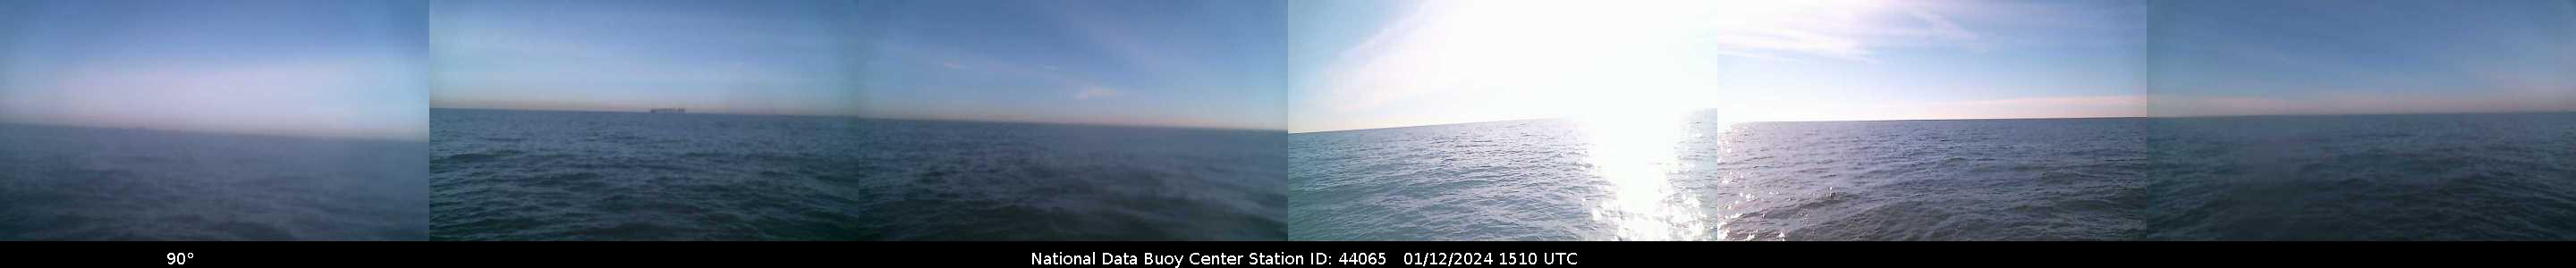

In [29]:
testImage = Image.open("testImage.jpeg")
testImage

First, cut the bottom descriptive strip away (2880px x 31px)

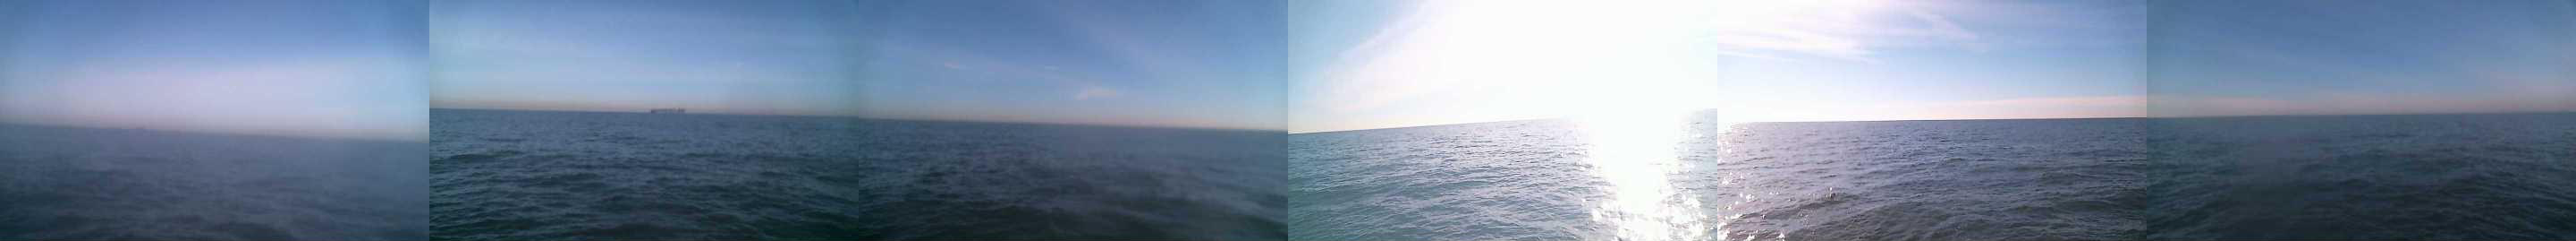

In [30]:
#Get dimensions of image
width, height = testImage.size

bottomStripHeight = 31
topStripHeight = height - bottomStripHeight

#Crop image to keep the top portion
topPortion = testImage.crop((0, 0, width, topStripHeight))
topPortion

Then, cut the remaining picture into 6 images

In [31]:
newWidth, newHeight = topPortion.size

# Calculate the width of each part
part_newWidth = width // 6

part_newWidth

480

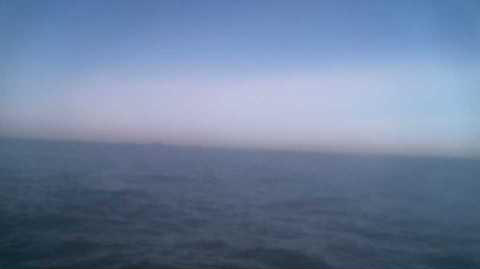

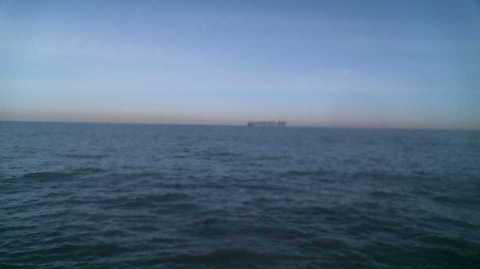

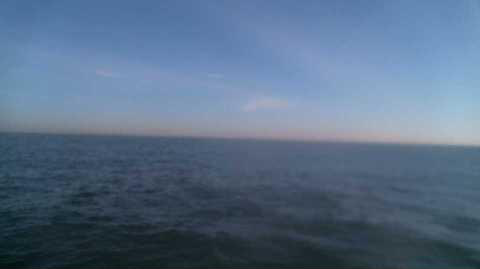

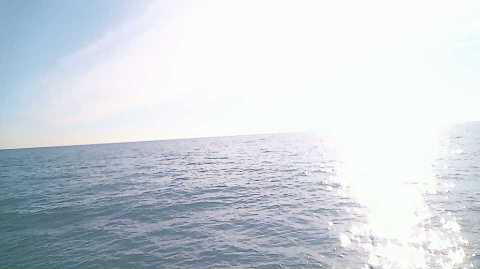

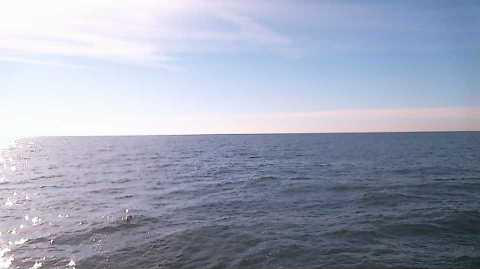

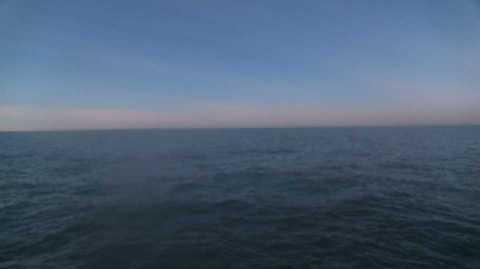

In [33]:
#Crop image into 6 parts
for i in range(6):
    left = i * part_newWidth
    upper = 0
    right = (i + 1) * part_newWidth
    lower = newHeight
    
    part = topPortion.crop((left, upper, right, lower))
    part.save(f"part{i+1}.jpg")
    
    display(part)